<a href="https://colab.research.google.com/github/TeteRajit/Sentiment_Analysis/blob/main/Intern_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WEB SCRAPPING

In [ ]:
from bs4 import BeautifulSoup as bs
import requests

In [ ]:
cust_name = []
review_title = []
ratings = []
user_review = []
model_name = []

In [ ]:
links = {
    'link1': {
        'link': 'https://www.flipkart.com/samsung-galaxy-s23-ultra-5g-cream-512-gb/product-reviews/itm1db5d333d4ee1?pid=MOBGMFFXEHJGRUXK&lid=LSTMOBGMFFXEHJGRUXKYBVAQY&marketplace=FLIPKART&page=',
        'pages': 13
    },
    'link2':{
        'link': 'https://www.flipkart.com/samsung-galaxy-s23-5g-green-256-gb/product-reviews/itm6840743bfd1ef?pid=MOBGMFFXB7RGPNET&lid=LSTMOBGMFFXB7RGPNETJZGNDL&marketplace=FLIPKART&page=',
        'pages': 32
    },
    'link3':{
        'link': 'https://www.flipkart.com/samsung-galaxy-s23-plus-5g-cream-256-gb/product-reviews/itm25f24fcefef3b?pid=MOBGMFFXT4HDAZYH&lid=LSTMOBGMFFXT4HDAZYHJDNMQ3&marketplace=FLIPKART&page=',
        'pages': 4
    }
}
model = 0
for j in links.values():
  model = model + 1
  for i in range(1,j['pages']):
    page = requests.get(j['link']+str(i))
    soup = bs(page.content,'html.parser')
    names = soup.find_all('p', class_="_2sc7ZR _2V5EHH")

    for i in range(0,len(names)):
      cust_name.append(names[i].get_text())
    #print(len(cust_name))
    title = soup.find_all('p',class_='_2-N8zT')

    for i in range(0,len(title)):
      review_title.append(title[i].get_text())
    rating = soup.find_all('div',class_ = ['_3LWZlK _1rdVr6 _1BLPMq' , '_3LWZlK _1BLPMq','_3LWZlK _32lA32 _1BLPMq'])
    rate=[]

    for i in range(0,len(rating)):
      rate.append(rating[i].get_text())

    #print(len(rate))
    for i in rate:
      ratings.append(i[:1])
    ratings = [int(i) for i in ratings]
    review = soup.find_all('div',class_='t-ZTKy')

    for i in range(0,len(review)):
      user_review.append(review[i].get_text())
    user_review[:] = [reviews.strip('\n') for reviews in user_review]

    for i in range(0,len(review)):
      if model == 1:
        model_name.append('S23Ultra')
      elif model == 2:
        model_name.append('S23')
      elif model == 3:
        model_name.append('S23plus')



In [ ]:
print(len(user_review),
len(cust_name),
len(review_title),
len(ratings),len(model_name))

441 441 441 441 441


In [ ]:
print(cust_name)
print(review_title)
print(ratings)
print(user_review)
print(model_name)

['Akhil S Kottaram', 'Flipkart Customer', 'Aryan Azad', 'Rejeesh N V', 'Ananya Anubhav Saikia', 'Sandeep Karora', 'Shammi Kapoor', 'Shubham K Singh', 'Sumit Maheshwari', 'Bhubesh Joshi', 'Pavan Yadav', 'shishir kumar', 'shreyansh Yadav', 'Kawaljit Kakkad', 'Neeraj Rakholia', 'Jugnoo Kumar', 'VASIREDDY DILIP KUMAR', 'Hari Surendran', 'Raaj Kadambala ', 'Shankar Ganesh J', 'Rohan Sankulkar', 'Waseem Akram Shaik', 'Vijay Thapliyal', 'Aditya  Lawrance', 'Samrat Dutta', 'Viral Mehta', 'Rohit Sankhala', 'Ravi sharma', 'Hari Avula', 'Kavita Rajesh', 'Deepak  Ratan', 'Siva Gandi', 'Rahesh Rajeev', 'Gajanan Mehta', 'Siddhesh Karekar', 'sibasish panigrahi', 'Anakala Naveen', 'Paul Mannam ', 'Dr. Steven  Lazar ', 'Nagesh K P', 'kunal verma', 'Rahul Sharma', 'Suresh koutam', 'HARSH  KUMAR', 'Abhi Panthi', 'Bhaskar Gummadapu ', 'Sornavel L', 'Pratim Deb', 'Sanjaykumar madan  Pandit ', 'Barkat Ali', 'Flipkart Customer', 'Devaraj  Uppar', 'Manish Kahane', 'Sujoy Sukladas', 'Flipkart Customer', 'Rakes

In [ ]:
import pandas as pd
df = pd.DataFrame()
df['Customer_Name']= cust_name
df['Rating'] = ratings
df['Review_Title']= review_title
df['User_Review']=user_review
df['model_name']= model_name

In [ ]:
df

,Customer_Name,Rating,Review_Title,User_Review,model_name
0,Akhil S Kottaram,5,Awesome,"Excellent product and awesome features , zoom ...",S23Ultra
1,Flipkart Customer,5,Worth every penny,"I ordered the product during pre-book period, ...",S23Ultra
2,Aryan Azad,5,Brilliant,One of the best camera phone 🤳 📱#samsung galax...,S23Ultra
3,Rejeesh N V,5,Highly recommended,Fantastic mobile in all means. This is the bes...,S23Ultra
4,Ananya Anubhav Saikia,5,Best in the market!,The best of the best. S23 Ultra is the best ph...,S23Ultra
...,...,...,...,...,...
436,Savneet Khanna,5,Perfect product!,Good flat display. Currenlt battery is also go...,S23plus
437,Himanshu Modak,3,Just okay,"Samsung S23+ (256 GB)This was my first time, u...",S23plus
438,Ankit Verma,5,Highly recommended,Exceptional Performance and Experience.Have Ba...,S23plus
439,Flipkart Customer,2,Bad quality,Not good product it's worst service from Flipk...,S23plus


In [ ]:
df.shape

(441, 5)

In [ ]:
df.to_csv('/content/reviewData.csv')

# **TEXT MINING**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/reviewData.csv")

In [ ]:
df.head()

,Unnamed: 0,Customer_Name,Rating,Review_Title,User_Review,model_name
0,0,Akhil S Kottaram,5,Awesome,"Excellent product and awesome features , zoom ...",S23Ultra
1,1,Flipkart Customer,5,Worth every penny,"I ordered the product during pre-book period, ...",S23Ultra
2,2,Aryan Azad,5,Brilliant,One of the best camera phone 🤳 📱#samsung galax...,S23Ultra
3,3,Rejeesh N V,5,Highly recommended,Fantastic mobile in all means. This is the bes...,S23Ultra
4,4,Ananya Anubhav Saikia,5,Best in the market!,The best of the best. S23 Ultra is the best ph...,S23Ultra


In [ ]:
import nltk
from nltk.corpus import stopwords
from wordcloud import STOPWORDS

In [ ]:
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
textt =" ".join(review for review in df["User_Review"])

In [ ]:
df1 = df['User_Review']

In [ ]:
df1

0      Excellent product and awesome features , zoom ...
1      I ordered the product during pre-book period, ...
2      One of the best camera phone 🤳 📱#samsung galax...
3      Fantastic mobile in all means. This is the bes...
4      The best of the best. S23 Ultra is the best ph...
                             ...                        
436    Good flat display. Currenlt battery is also go...
437    Samsung S23+ (256 GB)This was my first time, u...
438    Exceptional Performance and Experience.Have Ba...
439    Not good product it's worst service from Flipk...
440     Worst product as compared with one plusREAD MORE
Name: User_Review, Length: 441, dtype: object

In [ ]:
textt

"Excellent product and awesome features , zoom is beyond comparisonExcellent display and good battery life. S pen is a master in it's own league.While sticking screen guards Kindly make sure glue doesn't leak to the speaker or S pen  modules as it may create an issue Inorder to avail the offerPlease go toAccountCouponsAll rewards and scroll downYou will get the offer mentioned and you can order the same if you are eligibleHappy purchasingREAD MORE I ordered the product during pre-book period, exchanging my old OP6.The product is great, the seller delivered in time. The exchange process with Flipkart was also great. After the return period I got my Galaxy buds 2 and Watch 4 classic as well.The camera quality is excellent, the battery life is great as well. I am getting around 10 hours SOT, and 24 hours total time in a full recharge.OneUI is one of the best Android experience you can get.Overall a great deal.READ MORE One of the best camera phone 🤳 📱#samsung galaxy s23 ultra 💯 🤞READ MORE

In [ ]:
# import string
# no_punc_text = textt.translate(str.maketrans(" ", " ", string.punctuation))

In [ ]:
# no_punc_text

In [ ]:
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import string
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
my_stopwords = stopwords.words('english')

In [ ]:
def clean_text(text):
  ps = PorterStemmer()
  text_cleaned = "".join([x for x in text if x not in string.punctuation])
  text_cleaned = re.sub(' +', ' ', text_cleaned)
  text_cleaned = text_cleaned.lower()
  tokens = text_cleaned.split(" ")
  tokens = [token for token in tokens if token not in my_stopwords]
  text_cleaned = " ".join([ps.stem(token) for token in tokens])
  emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"
                           u"\U0001F300-\U0001F5FF"
                           u"\U0001F680-\U0001F6FF"
                           u"\U0001F1E0-\U0001F1FF"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
  text_cleaned = emoji_pattern.sub(r'', text_cleaned)
  return text_cleaned


In [ ]:
df['Clean_reviews'] = df['User_Review'].apply(clean_text)

<ipython-input-81-2e6256ca258c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df['Clean_reviews']

0      excel product awesom featur zoom beyond compar...
1      order product prebook period exchang old op6th...
2      one best camera phone 🤳 samsung galaxi s23 ult...
3      fantast mobil mean best android market without...
4      best best s23 ultra best phone world right now...
                             ...                        
435    phone good size weight big littl bit heavi oth...
436    good flat display currenlt batteri also good d...
438    except perform experiencehav batteri backup le...
439               good product worst servic flipkartread
440                    worst product compar one plusread
Name: Clean_reviews, Length: 427, dtype: object

In [ ]:
df

,Unnamed: 0,Customer_Name,Rating,Review_Title,User_Review,model_name,Clean_reviews,sentiment
0,0,Akhil S Kottaram,5,Awesome,"Excellent product and awesome features , zoom ...",S23Ultra,excel product awesom featur zoom beyond compar...,1
1,1,Flipkart Customer,5,Worth every penny,"I ordered the product during pre-book period, ...",S23Ultra,order product prebook period exchang old op6th...,1
2,2,Aryan Azad,5,Brilliant,One of the best camera phone 🤳 📱#samsung galax...,S23Ultra,one best camera phone 🤳 samsung galaxi s23 ult...,1
3,3,Rejeesh N V,5,Highly recommended,Fantastic mobile in all means. This is the bes...,S23Ultra,fantast mobil mean best android market without...,1
4,4,Ananya Anubhav Saikia,5,Best in the market!,The best of the best. S23 Ultra is the best ph...,S23Ultra,best best s23 ultra best phone world right now...,1
...,...,...,...,...,...,...,...,...
435,435,Naresh Veerwal,5,Highly recommended,Phone is very good but size and weight is big ...,S23plus,phone good size weight big littl bit heavi oth...,1
436,436,Savneet Khanna,5,Perfect product!,Good flat display. Currenlt battery is also go...,S23plus,good flat display currenlt batteri also good d...,1
438,438,Ankit Verma,5,Highly recommended,Exceptional Performance and Experience.Have Ba...,S23plus,except perform experiencehav batteri backup le...,1
439,439,Flipkart Customer,2,Bad quality,Not good product it's worst service from Flipk...,S23plus,good product worst servic flipkartread,-1


In [ ]:
# from textblob import TextBlob
# def getPolarity(Clean_reviews):
#   return TextBlob(Clean_reviews).sentiment.polarity
# df['Polarity'] = df['Clean_reviews'].apply(getPolarity)


In [ ]:
df

,Unnamed: 0,Customer_Name,Rating,Review_Title,User_Review,model_name,Clean_reviews
0,0,Akhil S Kottaram,5,Awesome,"Excellent product and awesome features , zoom ...",S23Ultra,excel product awesom featur zoom beyond compar...
1,1,Flipkart Customer,5,Worth every penny,"I ordered the product during pre-book period, ...",S23Ultra,order product prebook period exchang old op6th...
2,2,Aryan Azad,5,Brilliant,One of the best camera phone 🤳 📱#samsung galax...,S23Ultra,one best camera phone 🤳 📱samsung galaxi s23 ul...
3,3,Rejeesh N V,5,Highly recommended,Fantastic mobile in all means. This is the bes...,S23Ultra,fantast mobil mean best android market without...
4,4,Ananya Anubhav Saikia,5,Best in the market!,The best of the best. S23 Ultra is the best ph...,S23Ultra,best best s23 ultra best phone world right now...
...,...,...,...,...,...,...,...
436,436,Savneet Khanna,5,Perfect product!,Good flat display. Currenlt battery is also go...,S23plus,good flat display currenlt batteri also good d...
437,437,Himanshu Modak,3,Just okay,"Samsung S23+ (256 GB)This was my first time, u...",S23plus,samsung s23 256 gbthi first time use samsung d...
438,438,Ankit Verma,5,Highly recommended,Exceptional Performance and Experience.Have Ba...,S23plus,except perform experiencehav batteri backup le...
439,439,Flipkart Customer,2,Bad quality,Not good product it's worst service from Flipk...,S23plus,good product worst servic flipkartread


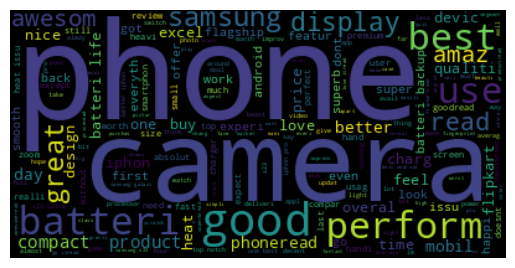

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
allwords = ' '.join([i for i in df['Clean_reviews']])
wordcloud = WordCloud().generate(allwords)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
df = df[df['Rating'] != 3]
df['sentiment'] = df['Rating'].apply(lambda rating : +1 if rating > 3 else -1)

<ipython-input-74-f67a220fab93>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# def getAnalysis(score):
#   if score < 0:
#     return 'Negative'
#   elif score == 0:
#     return 'Neutral'
#   else:
#     return 'Positive'

# df['Analysis'] = df['Polarity'].apply(getAnalysis)

In [ ]:
df

,Unnamed: 0,Customer_Name,Rating,Review_Title,User_Review,model_name,Clean_reviews,sentiment
0,0,Akhil S Kottaram,5,Awesome,"Excellent product and awesome features , zoom ...",S23Ultra,excel product awesom featur zoom beyond compar...,1
1,1,Flipkart Customer,5,Worth every penny,"I ordered the product during pre-book period, ...",S23Ultra,order product prebook period exchang old op6th...,1
2,2,Aryan Azad,5,Brilliant,One of the best camera phone 🤳 📱#samsung galax...,S23Ultra,one best camera phone 🤳 📱samsung galaxi s23 ul...,1
3,3,Rejeesh N V,5,Highly recommended,Fantastic mobile in all means. This is the bes...,S23Ultra,fantast mobil mean best android market without...,1
4,4,Ananya Anubhav Saikia,5,Best in the market!,The best of the best. S23 Ultra is the best ph...,S23Ultra,best best s23 ultra best phone world right now...,1
...,...,...,...,...,...,...,...,...
435,435,Naresh Veerwal,5,Highly recommended,Phone is very good but size and weight is big ...,S23plus,phone good size weight big littl bit heavi oth...,1
436,436,Savneet Khanna,5,Perfect product!,Good flat display. Currenlt battery is also go...,S23plus,good flat display currenlt batteri also good d...,1
438,438,Ankit Verma,5,Highly recommended,Exceptional Performance and Experience.Have Ba...,S23plus,except perform experiencehav batteri backup le...,1
439,439,Flipkart Customer,2,Bad quality,Not good product it's worst service from Flipk...,S23plus,good product worst servic flipkartread,-1


In [ ]:
df.to_csv('/content/Cleaned_reviewsData.csv')

In [ ]:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]


In [ ]:
positive['Clean_reviews']

0      excel product awesom featur zoom beyond compar...
1      order product prebook period exchang old op6th...
2      one best camera phone 🤳 📱samsung galaxi s23 ul...
3      fantast mobil mean best android market without...
4      best best s23 ultra best phone world right now...
                             ...                        
433                                             niceread
434    good phone love spec lil budget friendli need ...
435    phone good size weight big littl bit heavi oth...
436    good flat display currenlt batteri also good d...
438    except perform experiencehav batteri backup le...
Name: Clean_reviews, Length: 389, dtype: object

In [ ]:
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(positive['Clean_reviews'])

TypeError: ignored

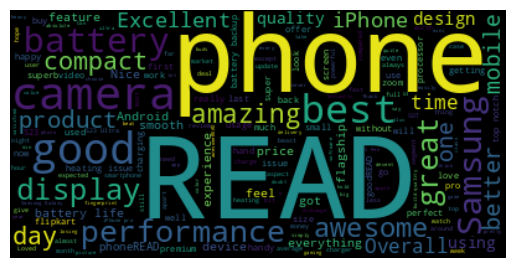

In [ ]:
stopwords = set(STOPWORDS)
#stopwords.update(["br", "href","good","great"])
pos = " ".join(review for review in positive.User_Review)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

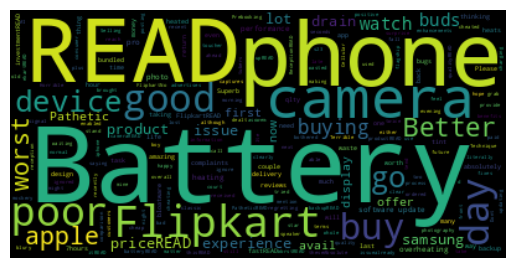

In [ ]:
neg = " ".join(review for review in negative.User_Review)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()

In [ ]:
import plotly.express as px
fig = px.histogram(df, x="sentiment")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')
fig.show()